In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPool1D, LSTM, GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

import math

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

np.random.seed(123)
tf.random.set_seed(123)

In [2]:
df=pd.read_csv('./HINDUNILVR.csv',index_col='Date',parse_dates=True)

In [3]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HINDLEVER,EQ,2136.60,2300.0,2307.55,2300.00,2307.55,2307.55,2307.08,24903,5.745330e+12,NaN,NaN,NaN
2000-01-04,HINDLEVER,EQ,2307.55,2381.0,2381.00,2250.00,2270.00,2281.05,2298.15,58514,1.344740e+13,NaN,NaN,NaN
2000-01-05,HINDLEVER,EQ,2281.05,2200.0,2250.00,2105.00,2183.50,2199.90,2211.17,80296,1.775482e+13,NaN,NaN,NaN
2000-01-06,HINDLEVER,EQ,2199.90,2224.9,2360.00,2210.00,2300.00,2288.20,2301.80,190032,4.374157e+13,NaN,NaN,NaN
2000-01-07,HINDLEVER,EQ,2288.20,2300.0,2452.00,2282.25,2395.00,2412.95,2380.24,192582,4.583919e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,HINDUNILVR,EQ,2307.75,2324.0,2369.80,2311.00,2367.70,2360.65,2340.89,1946867,4.557405e+14,85684.0,1289103.0,0.6621
2021-04-27,HINDUNILVR,EQ,2360.65,2363.0,2386.45,2352.95,2378.00,2379.85,2374.40,1668456,3.961583e+14,84641.0,1089882.0,0.6532
2021-04-28,HINDUNILVR,EQ,2379.85,2380.0,2445.00,2366.30,2404.00,2406.55,2414.15,1951215,4.710522e+14,84910.0,1024216.0,0.5249


In [4]:
df['Date']=df.index

In [5]:
start_date='2011-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

In [6]:
df=df.loc[mask]

In [7]:
df=df.drop(columns=['Series','Symbol','Open','High','Low','Last','Close','VWAP','Volume','Turnover','Trades','Deliverable Volume','%Deliverble','Date'])

In [8]:
Ntest=math.trunc(0.3*len(df))
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]

In [9]:
train_idx=df.index<=train.index[-1]
test_idx=df.index>train.index[-1]

In [10]:
df['Diff Prev Close']=df['Prev Close'].diff()

In [11]:
series=df['Diff Prev Close'].dropna().to_numpy()

T=50
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print("X.shape",X.shape,"Y.shape",Y.shape)

X.shape (2427, 50) Y.shape (2427,)


In [12]:
Xtrain,Ytrain=X[:-Ntest],Y[:-Ntest]
Xtest,Ytest=X[-Ntest:],Y[-Ntest:]

LSTM+CNN

In [13]:
i=Input(shape=(T,1))
x=LSTM(200,return_sequences=True)(i)
x=LSTM(200,return_sequences=True)(x)
x=Dense(100)(x)
x=Dense(50)(x)
x=Conv1D(25,3,activation='relu')(i)
x=MaxPooling1D(2)(x)
x=Conv1D(50,3,activation='relu')(x)
x=GlobalMaxPool1D()(x)
x=Dense(1)(x)
model_lstm_cnn=Model(i,x)
model_lstm_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 48, 25)            100       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 25)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 50)            3800      
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 1)                 51    

In [14]:
check_point_lstm_cnn=ModelCheckpoint('best_model.h5',monitor='val_loss',save_best_only=True)

In [15]:
model_lstm_cnn.compile(loss='mse',
              optimizer='adamax',
              metrics=['mae','mse'])

In [16]:
r=model_lstm_cnn.fit(
    Xtrain,
    Ytrain,
    epochs=100,
    validation_data=(Xtest,Ytest),
    callbacks=[check_point_lstm_cnn]
)

Epoch 1/100
53/53 [==============================] - 1s 11ms/step - loss: 110.0010 - mae: 7.3425 - mse: 110.0010 - val_loss: 1059.7301 - val_mae: 21.1790 - val_mse: 1059.7301
Epoch 2/100
53/53 [==============================] - 0s 5ms/step - loss: 108.8876 - mae: 7.2919 - mse: 108.8876 - val_loss: 1030.2826 - val_mae: 20.6795 - val_mse: 1030.2826
Epoch 3/100
53/53 [==============================] - 0s 4ms/step - loss: 108.1462 - mae: 7.2692 - mse: 108.1462 - val_loss: 1027.5083 - val_mae: 20.6415 - val_mse: 1027.5083
Epoch 4/100
53/53 [==============================] - 0s 5ms/step - loss: 108.1296 - mae: 7.2743 - mse: 108.1296 - val_loss: 1026.3542 - val_mae: 20.6374 - val_mse: 1026.3542
Epoch 5/100
53/53 [==============================] - 0s 5ms/step - loss: 107.2953 - mae: 7.2429 - mse: 107.2953 - val_loss: 1030.2664 - val_mae: 20.7371 - val_mse: 1030.2664
Epoch 6/100
53/53 [==============================] - 0s 5ms/step - loss: 106.9555 - mae: 7.2184 - mse: 106.9555 - val_loss: 1038.

LSTM+GRU

In [17]:
i=Input(shape=(T,1))
x=LSTM(200,return_sequences=True)(i)
x=LSTM(200,return_sequences=True)(x)
x=Dense(100)(x)
x=Dense(50)(x)
x=GRU(200,return_sequences=True)(x)
x=GRU(200,return_sequences=True)(x)
x=GlobalMaxPool1D()(x)
x=Dense(100)(x)
x=Dense(50)(x)
x=Dense(1)(x)
model_lstm_gru=Model(i,x)
model_lstm_gru.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 200)           161600    
                                                                 
 lstm_3 (LSTM)               (None, 50, 200)           320800    
                                                                 
 dense_3 (Dense)             (None, 50, 100)           20100     
                                                                 
 dense_4 (Dense)             (None, 50, 50)            5050      
                                                                 
 gru (GRU)                   (None, 50, 200)           151200    
                                                                 
 gru_1 (GRU)                 (None, 50, 200)           2412

In [18]:
check_point_lstm_gru=ModelCheckpoint('best_model.h5',monitor='val_loss',save_best_only=True)

In [19]:
model_lstm_gru.compile(loss='mse',
              optimizer='adamax',
              metrics=['mae','mse'])

In [20]:
r=model_lstm_gru.fit(
    Xtrain,
    Ytrain,
    epochs=100,
    validation_data=(Xtest,Ytest),
    callbacks=[check_point_lstm_gru]
)

Epoch 1/100
53/53 [==============================] - 27s 398ms/step - loss: 108.6982 - mae: 7.2573 - mse: 108.6982 - val_loss: 1001.4660 - val_mae: 20.4455 - val_mse: 1001.4660
Epoch 2/100
53/53 [==============================] - 19s 361ms/step - loss: 108.5223 - mae: 7.2753 - mse: 108.5223 - val_loss: 1002.5777 - val_mae: 20.4071 - val_mse: 1002.5777
Epoch 3/100
53/53 [==============================] - 19s 362ms/step - loss: 108.6127 - mae: 7.2579 - mse: 108.6127 - val_loss: 1002.4669 - val_mae: 20.4072 - val_mse: 1002.4669
Epoch 4/100
53/53 [==============================] - 19s 363ms/step - loss: 108.6237 - mae: 7.2594 - mse: 108.6237 - val_loss: 1002.5545 - val_mae: 20.4047 - val_mse: 1002.5545
Epoch 5/100
53/53 [==============================] - 19s 361ms/step - loss: 108.4991 - mae: 7.2567 - mse: 108.4991 - val_loss: 1002.1260 - val_mae: 20.4118 - val_mse: 1002.1260
Epoch 6/100
53/53 [==============================] - 19s 363ms/step - loss: 108.5706 - mae: 7.2631 - mse: 108.5706 

Predictions



In [21]:
train_idx[:T+1]=False

In [22]:
Ptrain_lstm_cnn=model_lstm_cnn.predict(Xtrain).flatten()
Ptest_lstm_cnn=model_lstm_cnn.predict(Xtest).flatten()

In [23]:
Ptrain_lstm_gru=model_lstm_gru.predict(Xtrain).flatten()
Ptest_lstm_gru=model_lstm_gru.predict(Xtest).flatten()

In [24]:
df.loc[train_idx,'Diff LSTM+CNN train prediction']=Ptrain_lstm_cnn
df.loc[test_idx,'Diff LSTM+CNN test prediction']=Ptest_lstm_cnn

In [25]:
df.loc[train_idx,'Diff LSTM+GRU train prediction']=Ptrain_lstm_gru
df.loc[test_idx,'Diff LSTM+GRU test prediction']=Ptest_lstm_gru

In [26]:
df['Shift Prev Close']=df['Prev Close'].shift(1)
prev=df['Shift Prev Close']

In [27]:
last_train=train.iloc[-1]['Prev Close']

In [28]:
df.loc[train_idx,'train_LSTM_CNN']=prev[train_idx]+Ptrain_lstm_cnn
df.loc[test_idx,'Prediction_LSTM_CNN']=prev[test_idx]+Ptest_lstm_cnn

In [29]:
df.loc[train_idx,'train_LSTM_GRU']=prev[train_idx]+Ptrain_lstm_gru
df.loc[test_idx,'Prediction_LSTM_GRU']=prev[test_idx]+Ptest_lstm_gru

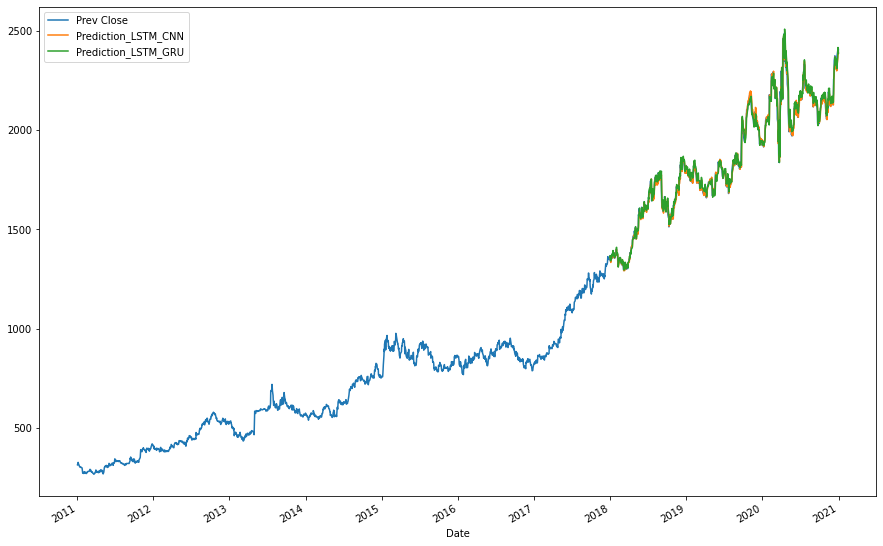

In [30]:
df[['Prev Close' ,'Prediction_LSTM_CNN','Prediction_LSTM_GRU']].plot(figsize=(15,10));

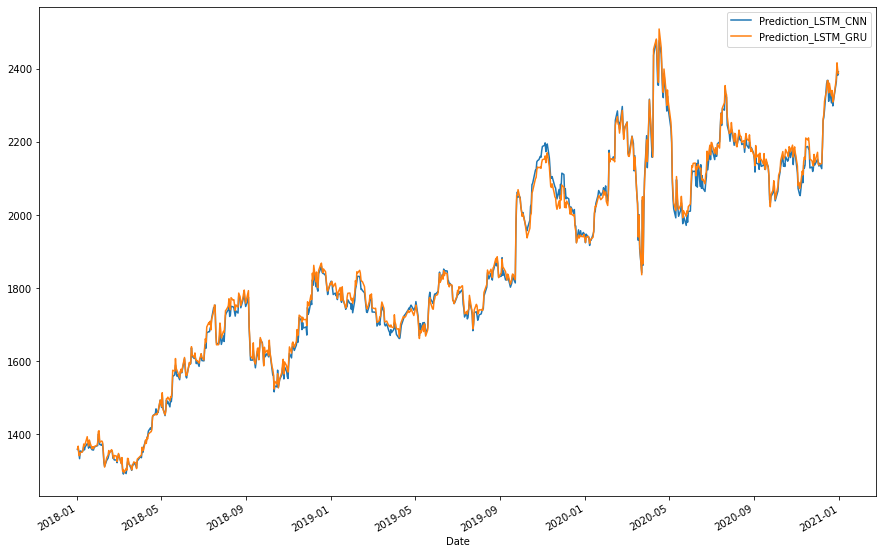

In [31]:
df[['Prediction_LSTM_CNN','Prediction_LSTM_GRU']].plot(figsize=(15,10));

In [32]:
pred_lstm_cnn=df['Prediction_LSTM_CNN']
pred_lstm_cnn.dropna(inplace=True)

In [33]:
rmse=math.sqrt(mean_squared_error(test['Prev Close'],pred_lstm_cnn))
print(rmse)

32.30476794307446


In [34]:
error=mean_absolute_error(test['Prev Close'],pred_lstm_cnn)
print(error)

21.216543504037716


In [35]:
r2_score(test['Prev Close'],pred_lstm_cnn)

0.986689643974698

In [36]:
pred_lstm_gru=df['Prediction_LSTM_GRU']
pred_lstm_gru.dropna(inplace=True)

In [37]:
rmse=math.sqrt(mean_squared_error(test['Prev Close'],pred_lstm_cnn))
print(rmse)

32.30476794307446


In [38]:
error=mean_absolute_error(test['Prev Close'],pred_lstm_gru)
print(error)

23.005029107647793


In [39]:
r2_score(test['Prev Close'],pred_lstm_gru)

0.9854666055648118